In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kmc import *
from plot import *

digits = np.loadtxt("data/MNIST_179_digits.txt")
labels = np.loadtxt("data/MNIST_179_labels.txt")
s = False
#prep_digits = np.c_[labels, digits]

In [3]:
def get_proportion(n, cluster):
    """
    Takes a number (n) and a list of values (cluster)
    and returns the proportion of values that in the lsit that match n
    """
    N = len(cluster)
    proportion = len(cluster[cluster == n])/N
    print(f"Proportion of {n}: {round(proportion * 100, 2)}%")
    return proportion

def get_proportions(numbers, cluster):
    """
    Returns all proportions for a given cluster
    """
    proportions = []
    for i in numbers:
        p = get_proportion(i, cluster)
        proportions.append(p)
#     print(f"Sum: {sum(proportions)}")
    return proportions

def get_cluster_proportions(numbers, clusters, prep_data):
    """
    Takes in a list of numbers and clusters.
    Returns the proportion of each number for each cluster
    """
    cluster_proportions = []
    for i in range(len(clusters)):
        print(f"Cluster: {i+1}")
        cluster = prep_data[clusters[i]][:, 0]
        cluster_proportion = get_proportions(numbers, cluster)
        cluster_proportions.append(cluster_proportion)
    return cluster_proportions

def plot_number(means, title):
    for i in range(len(means)):
        plt.imshow(np.reshape(means[i], (28,28)))
        plot_template(title=title + str(i+1), xlabel="", ylabel="", grid = False, equal_axis=False, save = s)

def get_prop_plot(k, numbers, data, labels, title):
    means = kmean(k, data)
    clusters = get_cluster(means, data)
    prep_data = np.c_[labels, data]
    get_cluster_proportions(numbers, clusters, prep_data)
    plot_number(means, title)

Cluster: 1
Proportion of 1: 83.33%
Proportion of 7: 8.94%
Proportion of 9: 7.72%
Cluster: 2
Proportion of 1: 85.35%
Proportion of 7: 11.62%
Proportion of 9: 3.03%
Cluster: 3
Proportion of 1: 0.15%
Proportion of 7: 48.46%
Proportion of 9: 51.4%


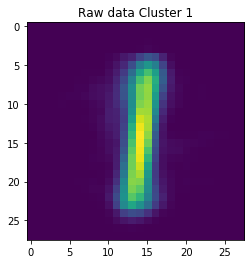

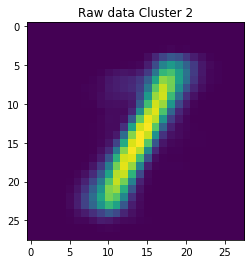

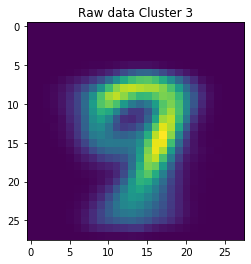

In [4]:
#Exercise 9a
numbers = [1,7,9]
get_prop_plot(3, numbers, digits, labels, "Raw data Cluster ")

In [11]:
# Exercise 9b
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def get_acc(k, train_x, train_y, test_x, test_y):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(test_x, test_y)
    acc = accuracy_score(train_y, model.predict(train_x))
    return acc

def cross_validate(k, XTrain, YTrain):
    '''For a value k, perform 5 fold cross validation for k nearest neighbors'''
    loss_list = []
    # create indices for CV
    cv = KFold(n_splits = 5)
    # loop over CV folds
    for train, test in cv.split(XTrain):
        XTrainCV, XTestCV, YTrainCV, YTestCV = XTrain[train], XTrain[test], YTrain[train], YTrain[test]
        lossTest = 1 - get_acc(k, XTrainCV, YTrainCV, XTestCV, YTestCV)
        loss_list.append(lossTest)
    average_loss = np.mean(loss_list)
    return average_loss

def find_best_k(k_list, XTrain, YTrain):
    '''Given a list of ks, perform 5 fold cross validation for each k and return the best k'''
    k_loss = []
    for k in k_list:
        loss = cross_validate(k, XTrain, YTrain)
        k_loss.append(loss)
        print("Loss for "+ str(k) + " neighbors: " + str(loss))
    ind = k_loss.index(min(k_loss))
    best_k = k_list[ind]
    acc = 1 - min(k_loss)
    print("====== Results ======")
    print(f"Best k: {best_k}\nAccuracy: {acc}")
    return best_k

In [12]:
k_list = [1, 3, 5, 7, 9, 11]
best_k = find_best_k(k_list, digits, labels)
# best_acc = get_acc(best_k, digits, labels, digits, labels)
# print(f"Best K: {best_k} Accuracy: {best_acc}")

Loss for 1 neighbors: 0.05577777777777777
Loss for 3 neighbors: 0.05822222222222222
Loss for 5 neighbors: 0.061111111111111116
Loss for 7 neighbors: 0.06644444444444446
Loss for 9 neighbors: 0.06577777777777778
Loss for 11 neighbors: 0.06844444444444446
====== Results ======
Best k: 1
Accuracy: 0.9442222222222222


In [6]:
# #Exercise 9b #MY IMPLEMENTION DOES WORK, CHECK LATER
# from knn import *
# k_list = [1, 3, 5, 7, 9, 11]
# find_best_k(k_list, digits, labels)

In [7]:
# """MY KNN PREDICT FUNCTION RETURNS THE WRONG SIZE ARRAY"""
# #accuracy_score(labels, knn_predict(digits, 3, digits, labels))
# print(knn_predict(digits, 5, digits, labels))

In [14]:
# Exercise 10 a
from pca import *
e_vec, e_val = pca(digits)
cum_variance = np.cumsum(e_val/sum(e_val)) * 100
count = list(range(1, len(e_val)+1))
plt.plot(count, cum_variance)
plot_template(title= 'Cumulative Variance versus Principal Components of Digits',
             xlabel='Number of Principcal Components',
             ylabel='Percentage of Variance Captured',
             equal_axis=False, save = False)

<Figure size 432x288 with 0 Axes>

In [22]:
# Exercise 10b
from pca import *

def get_prop_plot_mds(k, numbers, data, labels, dimension, title):
    print("===============")
    print(f"{dimension} dimensions:")
    print("===============")
    reduced_data, eigenvectors = mds(data, data, dimension)
    reduced_means = kmean(k, reduced_data)
    clusters = get_cluster(reduced_means, reduced_data)
    prep_data = np.c_[labels, reduced_data]
    get_cluster_proportions(numbers, clusters, prep_data)
    reduced_means = np.array(reduced_means)
    means = mds_inv(reduced_means, eigenvectors, dimension)
    #plot_number(means, title=str(dimension) + title)

dimensions = [1, 20, 200]
s = False

for i in dimensions:
    get_prop_plot_mds(3, numbers, digits, labels, i, " dimensions Cluster ")

1 dimensions:
Cluster: 1
Proportion of 1: 5.48%
Proportion of 7: 46.97%
Proportion of 9: 47.55%
Cluster: 2
Proportion of 1: 95.7%
Proportion of 7: 3.49%
Proportion of 9: 0.81%
Cluster: 3
Proportion of 1: 0.0%
Proportion of 7: 49.01%
Proportion of 9: 50.99%
20 dimensions:
Cluster: 1
Proportion of 1: 83.33%
Proportion of 7: 8.94%
Proportion of 9: 7.72%
Cluster: 2
Proportion of 1: 86.22%
Proportion of 7: 11.22%
Proportion of 9: 2.55%
Cluster: 3
Proportion of 1: 0.15%
Proportion of 7: 48.46%
Proportion of 9: 51.39%
200 dimensions:
Cluster: 1
Proportion of 1: 83.33%
Proportion of 7: 8.94%
Proportion of 9: 7.72%
Cluster: 2
Proportion of 1: 85.35%
Proportion of 7: 11.62%
Proportion of 9: 3.03%
Cluster: 3
Proportion of 1: 0.15%
Proportion of 7: 48.46%
Proportion of 9: 51.4%


In [29]:
# Exercise 10c
#k_list = [1, 3, 5, 7, 9, 11]
def mds_acc(dim, k_list, data, labels):
    print("===============")
    print(f"{dim} dimensions:")
    print("===============")
    reduced_data, _ = mds(data, data, dim)
    #print(reduced_data)
#     best_k = find_best_k(k_list, reduced_data, labels)
#     best_acc = get_acc(best_k, reduced_data, labels, reduced_data, labels)
    find_best_k(k_list, reduced_data, labels)
    #print(f"Best K: {best_k} Accuracy: {best_acc}")

for i in dimensions[1:]:
    mds_acc(i, k_list, digits, labels)

20 dimensions:
Loss for 1 neighbors: 0.04977777777777779
Loss for 3 neighbors: 0.05311111111111111
Loss for 5 neighbors: 0.05444444444444445
Loss for 7 neighbors: 0.05311111111111113
Loss for 9 neighbors: 0.057777777777777775
Loss for 11 neighbors: 0.061555555555555544
====== Results ======
Best k: 1
Accuracy: 0.9502222222222222
200 dimensions:
Loss for 1 neighbors: 0.05577777777777777
Loss for 3 neighbors: 0.057777777777777775
Loss for 5 neighbors: 0.06066666666666667
Loss for 7 neighbors: 0.06555555555555556
Loss for 9 neighbors: 0.06533333333333333
Loss for 11 neighbors: 0.06733333333333333
====== Results ======
Best k: 1
Accuracy: 0.9442222222222222


In [19]:
r, e = mds(digits, digits, 1)
m = kmean(3, r)
m = np.array(m)
np.shape(mds_inv(m, e, 1))

(3, 784)

In [ ]:
# best_k = find_best_k(k_list, r, labels)
# best_acc = get_acc(best_k, r, labels, r, labels)
# print(f"Best K: {best_k} Accuracy: {best_acc}")

In [ ]:
def mds(target, source, d):
    """
    Transform a target using the eigenvectors of the source
    """
    eigenvectors, eigenvalues = pca(source) # calculate eigenvectors
    e_d = eigenvectors[:, :d] # select first d eigenvectors
    target = e_d.T @ target.T # transpose EV to d*D matrix, transpose data to D*N matrix, get d*N matrix
    target = target.T #transpose to N*d matrix
    return target, eigenvectors

def mds_inv(reduced_data, eigenvector, d):
    """Transfoms a reduced data set back to the original size using the original eigenvectors"""
    eigen_inv = np.linalg.inv(eigenvector) #calculat inverse
    e_inv = eigenvector[:, :d] #get desired number of dimensions
    data = e_inv @ reduced_data.T # D*d @ d*N
    data = data.T # convert to N*D
    return data

r, e = mds(digits, digits, 1)
# e_inv = np.linalg.inv(e)
# e_inv = e_inv[:, :1]
# np.shape(e_inv)
d = mds_inv(r, e, 1)
np.shape(d)

In [ ]:
np.shape(digits)

In [ ]:
numbers = [1,7,9]
get_prop_plot(3, numbers, digits, labels)

In [ ]:
# N = KNeighborsClassifier(n_neighbors=11)
# N.fit(digits, labels)
# accuracy_score(labels, N.predict(digits))

In [ ]:
x , u = np.unique(labels, return_counts=True)
np.where(u == max(u))

In [ ]:
# for i in range(len(clusters)):
#     print(f"Cluster: {i+1}")
#     get_proportions(numbers, prep_digits[clusters[i]][:, 0]) #get proportions for first column

In [ ]:
x = prep_digits[clusters[0]][:, 0]
get_proportions([1,3,7], x)

In [ ]:
len(x[x == 7])/len(x)

In [ ]:
get_proportion(7, x)

In [ ]:
#old ex 9a

from kmc import *
numbers = [1,7,9]
means = kmean(3, digits)
clusters = get_cluster(means, digits)
get_cluster_proportions(numbers, clusters, prep_digits)
plot_number(means)